In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
flights = pd.read_csv('../../Datasets/archive/flights.csv',low_memory=False)

In [3]:
flights.shape

(5819079, 31)

In [4]:
flights = flights.loc[:100000]

In [5]:
flights.shape

(100001, 31)

In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100001 non-null  int64  
 1   MONTH                100001 non-null  int64  
 2   DAY                  100001 non-null  int64  
 3   DAY_OF_WEEK          100001 non-null  int64  
 4   AIRLINE              100001 non-null  object 
 5   FLIGHT_NUMBER        100001 non-null  int64  
 6   TAIL_NUMBER          99834 non-null   object 
 7   ORIGIN_AIRPORT       100001 non-null  object 
 8   DESTINATION_AIRPORT  100001 non-null  object 
 9   SCHEDULED_DEPARTURE  100001 non-null  int64  
 10  DEPARTURE_TIME       97703 non-null   float64
 11  DEPARTURE_DELAY      97703 non-null   float64
 12  TAXI_OUT             97630 non-null   float64
 13  WHEELS_OFF           97630 non-null   float64
 14  SCHEDULED_TIME       100001 non-null  float64
 15  ELAPSED_TIME     

In [82]:
flights['DIVERTED'].value_counts()   #Microtask 1

0    99777
1      224
Name: DIVERTED, dtype: int64

In [8]:
flights_corr = flights.corr()

In [9]:
# flights_corr

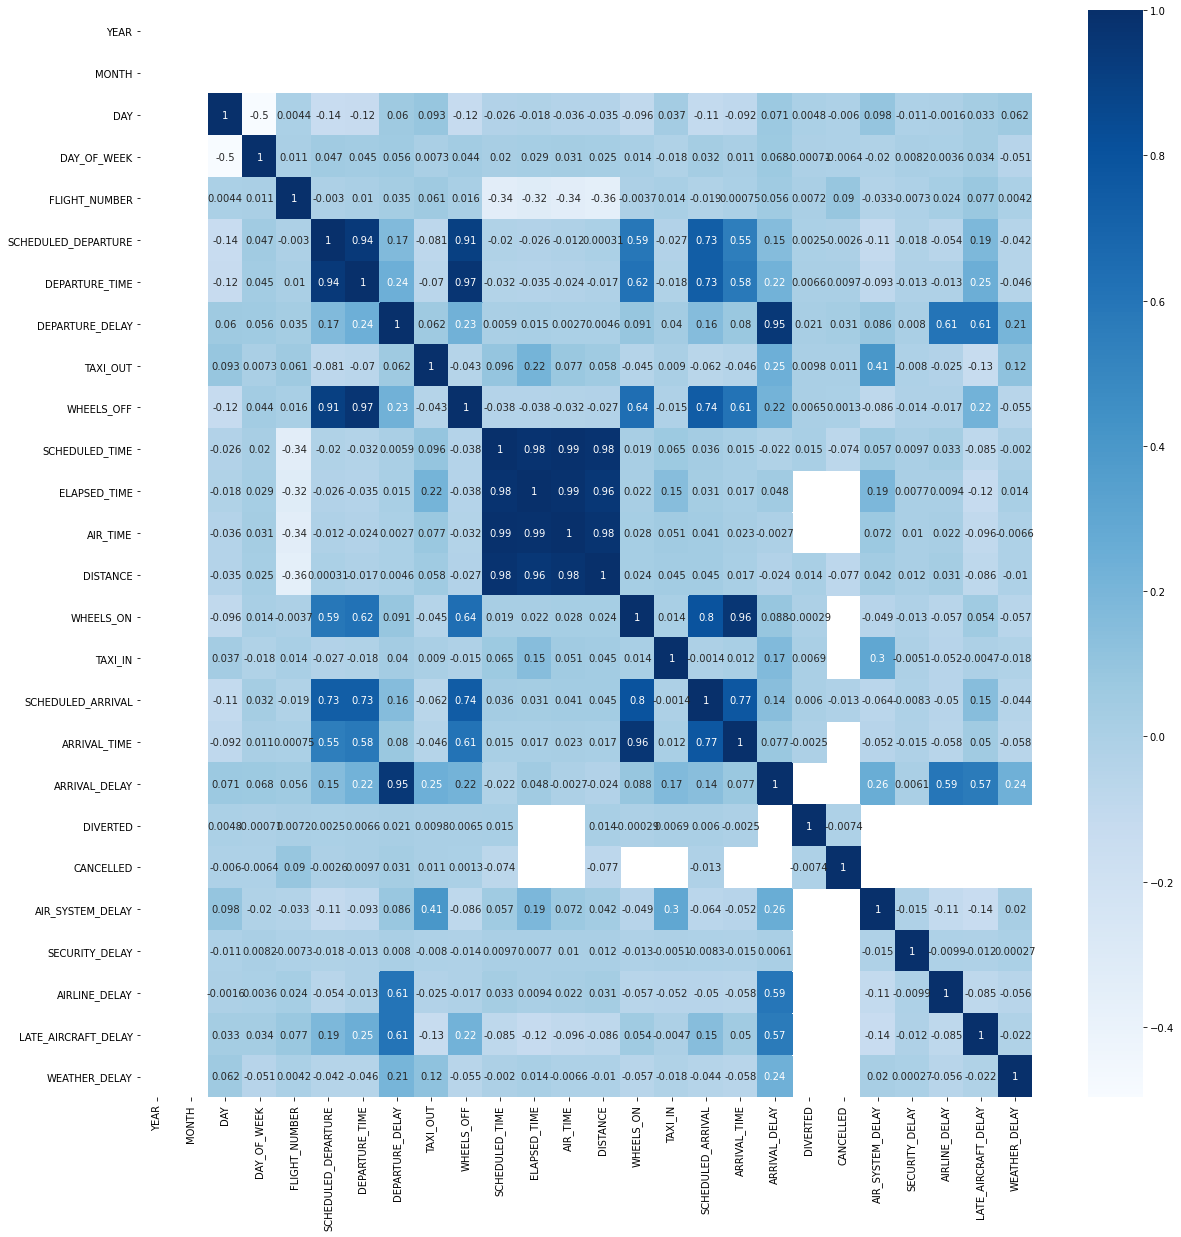

In [81]:
plt.figure(figsize=(20,20))
sns.heatmap(flights_corr,annot=True,cmap='Blues')
plt.show()

In [84]:
flights_corr['ARRIVAL_DELAY'].sort_values(ascending=False)[:2]   #Microtask 2

ARRIVAL_DELAY      1.000000
DEPARTURE_DELAY    0.950838
Name: ARRIVAL_DELAY, dtype: float64

In [13]:
flights.drop(['YEAR','DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER','TAIL_NUMBER','DEPARTURE_TIME', 'TAXI_OUT',
               'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE','WHEELS_ON', 'TAXI_IN',
               'ARRIVAL_TIME','CANCELLATION_REASON'],axis=1,inplace=True)

In [14]:
flights.shape

(100001, 15)

In [15]:
Null_Columns = [col for col in flights.columns if flights[col].isnull().sum() > 0]

In [16]:
Null_Columns

['DEPARTURE_DELAY',
 'ARRIVAL_DELAY',
 'AIR_SYSTEM_DELAY',
 'SECURITY_DELAY',
 'AIRLINE_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'WEATHER_DELAY']

In [17]:
for col in Null_Columns:
    flights[col] = flights[col].fillna(flights[col].mean())

In [18]:
# [col for col in flights.columns if flights[col].isnull().sum() > 0]

In [36]:
delay = []
for value in flights['ARRIVAL_DELAY'].values:
    if  value > 15:
        delay.append(1)
    else:
        delay.append(0)

In [39]:
flights['Result'] = pd.DataFrame(delay)

In [40]:
flights.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Result
0,1,1,ANC,SEA,5,-11.0,430,-22.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
1,1,1,LAX,PBI,10,-8.0,750,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
2,1,1,SFO,CLT,20,-2.0,806,5.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
3,1,1,LAX,MIA,20,-5.0,805,-9.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0
4,1,1,SEA,ANC,25,-1.0,320,-21.0,0,0,14.026801,0.070787,17.853921,26.014556,2.751971,0


In [42]:
flights['Result'].value_counts()         #Microtask 3

0    63780
1    36221
Name: Result, dtype: int64

In [46]:
flights.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis=1,inplace=True)

In [87]:
# flights.shape

In [50]:
y = flights['Result']
flights.drop(['Result'],axis=1,inplace=True)

In [51]:
X = flights.copy()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [55]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [63]:
scale = StandardScaler()

In [64]:
scale.fit_transform(X_train)

array([[ 0.00000000e+00,  1.79413195e+00, -5.72622711e-01, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04],
       [ 0.00000000e+00, -4.05868690e-01,  1.94111691e-01, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04],
       [ 0.00000000e+00, -9.55868850e-01,  1.06860336e+00, ...,
        -7.24627191e-02, -1.03254519e+00, -2.66554785e-01],
       ...,
       [ 0.00000000e+00,  6.94131631e-01,  1.29033466e+00, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04],
       [ 0.00000000e+00, -1.50586901e+00, -1.25646691e+00, ...,
        -7.09216085e-01,  1.10925838e+01, -2.66554785e-01],
       [ 0.00000000e+00, -9.55868850e-01, -1.24610563e+00, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04]])

In [65]:
scale.transform(X_test)

array([[ 0.00000000e+00, -4.05868690e-01,  4.42782308e-01, ...,
         2.06116879e-01, -9.92920582e-01, -2.66554785e-01],
       [ 0.00000000e+00,  6.94131631e-01, -1.46369242e+00, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04],
       [ 0.00000000e+00, -1.50586901e+00, -1.00157952e+00, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04],
       ...,
       [ 0.00000000e+00, -4.05868690e-01,  1.71721922e+00, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04],
       [ 0.00000000e+00,  1.44131471e-01,  2.97724448e-01, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04],
       [ 0.00000000e+00, -4.05868690e-01, -9.37339615e-01, ...,
         1.31791642e-03, -1.72869271e-03, -7.85259856e-04]])

In [66]:
model = DecisionTreeClassifier()

In [67]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
from sklearn.metrics import roc_auc_score

In [69]:
pred = model.predict(X_test)

In [86]:
print(roc_auc_score(y_test,pred))            #Microtask 5